In [1]:
import ast
import cv2
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
cap = cv2.VideoCapture('../../workspaces/demo-workspace/cropped_video.mp4')
if not cap.isOpened():
    raise ValueError('unable to open video, please check file path and type')
ret, frame = cap.read()

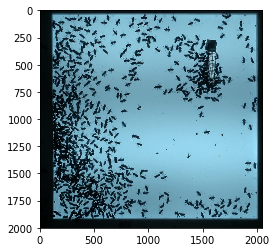

In [5]:
plt.imshow(frame)

In [7]:
with open('../../workspaces/demo-workspace/frame_data.txt', mode='r') as rf:
    first_line = rf.readline()
rf.close()

In [9]:
data = ast.literal_eval(first_line)

In [25]:
rect_demo = patches.Rectangle((1000,1000),100,100, linewidth=1, edgecolor='green', facecolor='none')
circle_demo = patches.Circle((1000,1000), radius=10, facecolor='red')

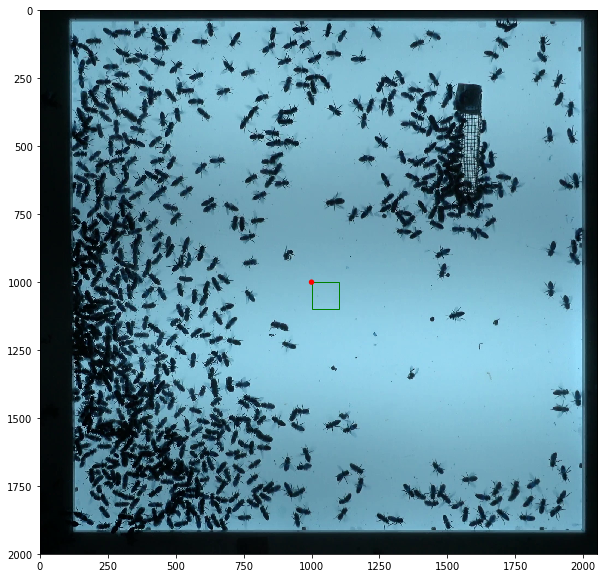

In [26]:
f, ax = plt.subplots(figsize=(10,10))
ax.imshow(frame)
ax.add_patch(rect_demo)
ax.add_patch(circle_demo)
plt.show()

In [43]:
rectangles = []
circles = []
for loc in data:
    x,y = loc[0]
    circle = patches.Circle((y,x), radius=10, facecolor='red')
    circles.append(circle)
    min_row, min_col = loc[1][0], loc[1][1]
    height, width = loc[1][2] - min_row, loc[1][3] - min_col
    rect = patches.Rectangle((min_col, min_row),width,height,linewidth=1,edgecolor='lime',facecolor='none')
    rectangles.append(rect)

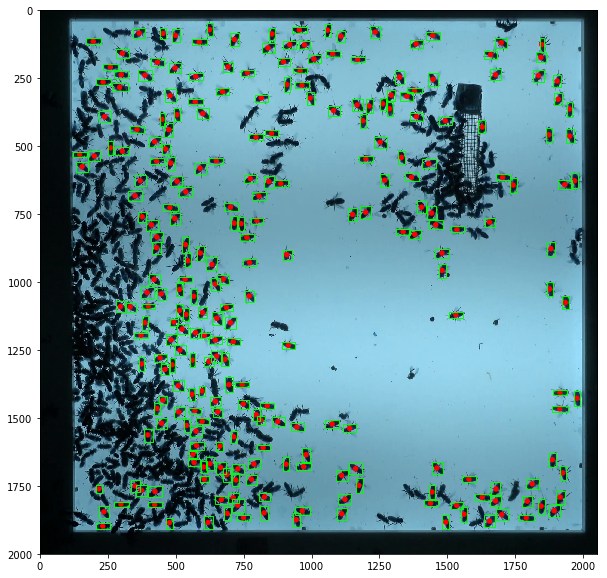

In [44]:
f, ax = plt.subplots(figsize=(10,10))
ax.imshow(frame)
for circle in circles:
    ax.add_patch(circle)
for rectangle in rectangles:
    ax.add_patch(rectangle)